In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np

In [7]:
from os import listdir
df_positive = pd.DataFrame()
for mat in listdir("ADHD_part1"):
    data_dict = loadmat("ADHD_part1\\"+ mat)
    data_array = data_dict[mat[:-4]]
    data_array = data_array.transpose(1, 0)
    df = pd.DataFrame(data_array,columns=[str(n) for n in range(1, len(data_dict[mat[:-4]])+1)])
    df = df.transpose()
    df['Result'] = 'Positive'
    df_positive = pd.concat([df_positive, df])
df_positive.shape

(1207069, 20)

In [8]:
df_negative = pd.DataFrame()
for mat in listdir("Control_part1"):
    data_dict = loadmat("Control_part1\\" + mat)
    data_array = data_dict[mat[:-4]]
    data_array = data_array.transpose(1, 0)
    df = pd.DataFrame(data_array,columns=[str(n) for n in range(1, len(data_dict[mat[:-4]])+1)])
    df = df.transpose()
    df['Result'] = 'Negative'
    df_negative = pd.concat([df_negative, df])
df_negative.shape

(959314, 20)

In [46]:
df = pd.concat([df_positive , df_negative])
df.columns = [int(i) for i in range(1 , 21)]

In [47]:
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
1,261.0,402.0,16.0,261.0,126.0,384.0,126.0,236.0,52.0,236.0,200.0,16.0,200.0,494.0,126.0,236.0,121.0,367.0,121.0,Positive
2,121.0,191.0,-94.0,85.0,16.0,200.0,126.0,52.0,347.0,273.0,16.0,-57.0,126.0,347.0,52.0,52.0,15.0,121.0,-19.0,Positive
3,-55.0,85.0,-204.0,15.0,-57.0,200.0,52.0,126.0,236.0,200.0,-20.0,-94.0,126.0,420.0,52.0,126.0,-55.0,261.0,85.0,Positive
4,191.0,85.0,52.0,50.0,89.0,236.0,163.0,89.0,89.0,89.0,89.0,-57.0,236.0,420.0,126.0,126.0,15.0,85.0,-55.0,Positive
5,-55.0,-125.0,-204.0,-160.0,-204.0,16.0,-241.0,-241.0,89.0,16.0,-20.0,-131.0,89.0,310.0,-57.0,52.0,-55.0,15.0,-336.0,Positive


DATA PREPROCESSING

In [48]:
df.dropna()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
1,261.0,402.0,16.0,261.0,126.0,384.0,126.0,236.0,52.0,236.0,200.0,16.0,200.0,494.0,126.0,236.0,121.0,367.0,121.0,Positive
2,121.0,191.0,-94.0,85.0,16.0,200.0,126.0,52.0,347.0,273.0,16.0,-57.0,126.0,347.0,52.0,52.0,15.0,121.0,-19.0,Positive
3,-55.0,85.0,-204.0,15.0,-57.0,200.0,52.0,126.0,236.0,200.0,-20.0,-94.0,126.0,420.0,52.0,126.0,-55.0,261.0,85.0,Positive
4,191.0,85.0,52.0,50.0,89.0,236.0,163.0,89.0,89.0,89.0,89.0,-57.0,236.0,420.0,126.0,126.0,15.0,85.0,-55.0,Positive
5,-55.0,-125.0,-204.0,-160.0,-204.0,16.0,-241.0,-241.0,89.0,16.0,-20.0,-131.0,89.0,310.0,-57.0,52.0,-55.0,15.0,-336.0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12925,649.0,754.0,715.0,825.0,825.0,1009.0,752.0,531.0,494.0,-204.0,936.0,678.0,678.0,825.0,862.0,936.0,754.0,965.0,367.0,Negative
12926,649.0,649.0,678.0,684.0,1009.0,899.0,752.0,200.0,-167.0,-683.0,1083.0,457.0,678.0,604.0,715.0,825.0,719.0,825.0,-371.0,Negative
12927,508.0,437.0,752.0,508.0,825.0,678.0,715.0,-94.0,-719.0,-683.0,936.0,494.0,825.0,531.0,604.0,604.0,578.0,684.0,-618.0,Negative
12928,437.0,367.0,531.0,508.0,715.0,641.0,715.0,-20.0,-462.0,-572.0,899.0,236.0,531.0,420.0,494.0,531.0,402.0,860.0,-266.0,Negative


In [49]:
df.isnull().sum()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64

In [50]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
columns = df.columns
for i in columns:
    if df[i].dtype == 'object':
        df[i] = encoder.fit_transform(df[i])
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
1,261.0,402.0,16.0,261.0,126.0,384.0,126.0,236.0,52.0,236.0,200.0,16.0,200.0,494.0,126.0,236.0,121.0,367.0,121.0,1
2,121.0,191.0,-94.0,85.0,16.0,200.0,126.0,52.0,347.0,273.0,16.0,-57.0,126.0,347.0,52.0,52.0,15.0,121.0,-19.0,1
3,-55.0,85.0,-204.0,15.0,-57.0,200.0,52.0,126.0,236.0,200.0,-20.0,-94.0,126.0,420.0,52.0,126.0,-55.0,261.0,85.0,1
4,191.0,85.0,52.0,50.0,89.0,236.0,163.0,89.0,89.0,89.0,89.0,-57.0,236.0,420.0,126.0,126.0,15.0,85.0,-55.0,1
5,-55.0,-125.0,-204.0,-160.0,-204.0,16.0,-241.0,-241.0,89.0,16.0,-20.0,-131.0,89.0,310.0,-57.0,52.0,-55.0,15.0,-336.0,1


In [51]:
#EXPLORATORY DATA ANALYSIS

In [52]:
df.count()

1     2166383
2     2166383
3     2166383
4     2166383
5     2166383
6     2166383
7     2166383
8     2166383
9     2166383
10    2166383
11    2166383
12    2166383
13    2166383
14    2166383
15    2166383
16    2166383
17    2166383
18    2166383
19    2166383
20    2166383
dtype: int64

In [53]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,2.166383e+06,2.166383e+06,2.166383e+06,2.166383e+06,2.166383e+06,2.166383e+06,2.166383e+06,2.166383e+06,2.166383e+06,2.166383e+06,2.166383e+06,2.166383e+06,2.166383e+06,2.166383e+06,2.166383e+06,2.166383e+06,2.166383e+06,2.166383e+06,2.166383e+06,2.166383e+06
mean,1.360903e+02,1.361619e+02,1.422117e+02,1.361022e+02,1.422737e+02,1.422005e+02,1.422755e+02,1.419608e+02,1.419823e+02,1.416007e+02,1.420600e+02,1.415633e+02,1.417452e+02,1.413199e+02,1.416635e+02,1.410618e+02,1.352097e+02,1.351830e+02,1.352074e+02,5.571817e-01
std,2.755497e+02,2.755136e+02,2.206503e+02,2.133873e+02,2.234852e+02,2.107195e+02,2.301860e+02,2.095699e+02,2.360460e+02,2.133996e+02,2.432087e+02,2.265186e+02,2.272337e+02,2.273205e+02,2.079590e+02,2.048027e+02,2.522447e+02,2.130295e+02,2.274500e+02,4.967196e-01
min,-3.786000e+03,-1.322400e+04,-3.921000e+03,-1.323700e+04,-3.921000e+03,-3.921000e+03,-3.921000e+03,-3.958000e+03,-3.995000e+03,-3.921000e+03,-3.995000e+03,-3.958000e+03,-3.958000e+03,-3.995000e+03,-3.921000e+03,-3.958000e+03,-3.786000e+03,-3.751000e+03,-3.751000e+03,0.000000e+00
25%,1.500000e+01,1.500000e+01,5.200000e+01,1.500000e+01,5.200000e+01,5.200000e+01,1.600000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,1.500000e+01,1.500000e+01,1.500000e+01,0.000000e+00
50%,1.210000e+02,1.210000e+02,1.260000e+02,1.210000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.210000e+02,1.210000e+02,1.210000e+02,1.000000e+00
75%,2.610000e+02,2.260000e+02,2.360000e+02,2.260000e+02,2.360000e+02,2.360000e+02,2.360000e+02,2.360000e+02,2.360000e+02,2.360000e+02,2.360000e+02,2.360000e+02,2.360000e+02,2.360000e+02,2.360000e+02,2.360000e+02,2.610000e+02,2.260000e+02,2.260000e+02,1.000000e+00
max,1.381300e+04,4.802000e+03,5.020000e+03,4.802000e+03,5.430000e+03,5.020000e+03,5.020000e+03,5.020000e+03,5.020000e+03,5.020000e+03,5.020000e+03,5.020000e+03,5.020000e+03,5.064000e+03,5.016000e+03,5.020000e+03,4.802000e+03,4.802000e+03,4.802000e+03,1.000000e+00


OUTLIER ANALYSIS(Interquartile Range)

<Axes: >

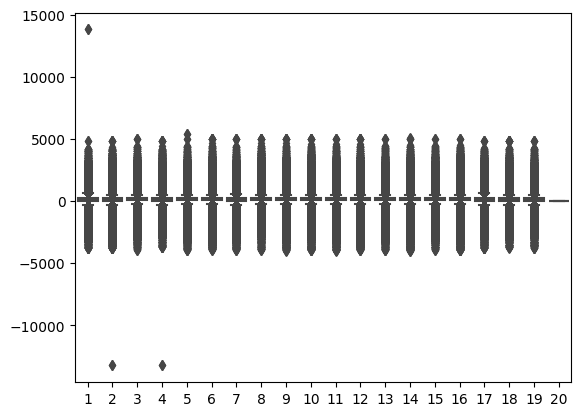

In [54]:
sns.boxplot(df)

Insights:
    There are more outliers.

In [55]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

<Axes: >

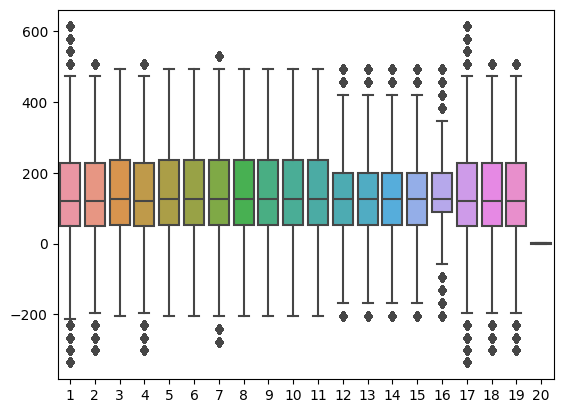

In [56]:
sns.boxplot(df1)

Now the number of outliers has been reduced.

#Logistic Regression 

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X=df1.iloc[:,0:19]
y=df1.iloc[:,19]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
lmodel=LogisticRegression(random_state=42)
lmodel.fit(X_train,y_train)

LogisticRegression(random_state=42)

#Prediction

In [87]:
y_pred=lmodel.predict(X_test)

In [88]:
accuracy = accuracy_score(y_test, y_pred)*100
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}%')
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 60.64%
Confusion Matrix:
[[     0 116476]
 [     0 179443]]


#Naive Bayes Estimator

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

#Predictions and Model Testing

In [90]:
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 61.76%


Artificial Neural Networks(ANN)
Model Building

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [113]:
X=df1.iloc[:,0:19]
y=df1.iloc[:,19]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Sequential()
model.add(Dense(20, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [114]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
29592/29592 [==============================] - 62s 2ms/step - loss: 0.6088 - accuracy: 0.7111 - val_loss: 0.5325 - val_accuracy: 0.7428
Epoch 2/10
29592/29592 [==============================] - 76s 3ms/step - loss: 0.5269 - accuracy: 0.7468 - val_loss: 0.5265 - val_accuracy: 0.7473
Epoch 3/10
29592/29592 [==============================] - 89s 3ms/step - loss: 0.5204 - accuracy: 0.7508 - val_loss: 0.5208 - val_accuracy: 0.7507
Epoch 4/10
29592/29592 [==============================] - 77s 3ms/step - loss: 0.5172 - accuracy: 0.7528 - val_loss: 0.5142 - val_accuracy: 0.7556
Epoch 5/10
29592/29592 [==============================] - 73s 2ms/step - loss: 0.5147 - accuracy: 0.7546 - val_loss: 0.5152 - val_accuracy: 0.7545
Epoch 6/10
29592/29592 [==============================] - 66s 2ms/step - loss: 0.5134 - accuracy: 0.7551 - val_loss: 0.5156 - val_accuracy: 0.7557
Epoch 7/10
29592/29592 [==============================] - 67s 2ms/step - loss: 0.5122 - accuracy: 0.7560 - val_loss: 0

Prediction and Testing

In [122]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

9248/9248 [==============================] - 11s 1ms/step


In [110]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 76.00


KMeans Clustering

In [68]:
df_positive = df_positive.drop('Result' , axis = 1)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram

In [69]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_positive)
kmodel = KMeans(n_clusters = 3)
kmodel.fit(scaled_df)

C:\Users\vamsi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

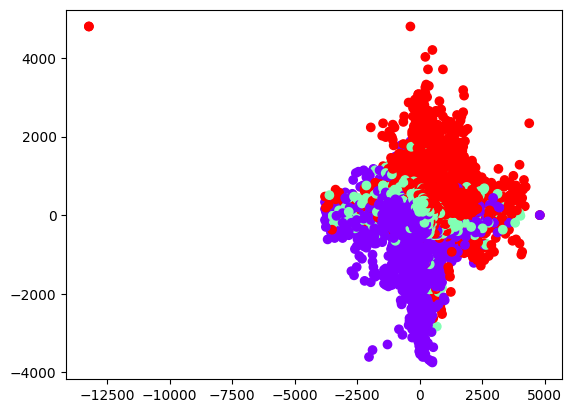

In [70]:
df_positive['Levels'] = kmodel.labels_
df_positive.head()
plt.scatter(df_positive[1] , df_positive[18] , c = df_positive['Levels'],cmap="rainbow")
plt.show()

#Model to classify levels (Decision Tree)

In [71]:
df_positive.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Levels
1,261.0,402.0,16.0,261.0,126.0,384.0,126.0,236.0,52.0,236.0,200.0,16.0,200.0,494.0,126.0,236.0,121.0,367.0,121.0,1
2,121.0,191.0,-94.0,85.0,16.0,200.0,126.0,52.0,347.0,273.0,16.0,-57.0,126.0,347.0,52.0,52.0,15.0,121.0,-19.0,1
3,-55.0,85.0,-204.0,15.0,-57.0,200.0,52.0,126.0,236.0,200.0,-20.0,-94.0,126.0,420.0,52.0,126.0,-55.0,261.0,85.0,1
4,191.0,85.0,52.0,50.0,89.0,236.0,163.0,89.0,89.0,89.0,89.0,-57.0,236.0,420.0,126.0,126.0,15.0,85.0,-55.0,1
5,-55.0,-125.0,-204.0,-160.0,-204.0,16.0,-241.0,-241.0,89.0,16.0,-20.0,-131.0,89.0,310.0,-57.0,52.0,-55.0,15.0,-336.0,0


In [75]:
from sklearn.tree import DecisionTreeClassifier
df_positive.columns = [i for i in range(1 , 21)]
df_1 = pd.DataFrame(scaler.fit_transform(df_positive))
X = (df_1.drop(19 , axis = 1))
Y =  df_positive[20]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
model_level = DecisionTreeClassifier()
X.columns = X.columns.astype(str)
model_level.fit(X_train,y_train)
y_pred = model_level.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred)*100)

[[ 72576   9628     22]
 [  9911 196097   8328]
 [    18   8390  57151]]
89.97655479798189


In [142]:
X_train.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
579,402.0,121.0,310.0,226.0,200.0,52.0,-20.0,52.0,16.0,163.0,420.0,89.0,236.0,89.0,126.0,89.0,191.0,-55.0,-90.0
8905,473.0,261.0,310.0,156.0,236.0,89.0,163.0,89.0,163.0,89.0,236.0,347.0,163.0,89.0,163.0,163.0,297.0,121.0,297.0
4691,226.0,121.0,273.0,332.0,273.0,236.0,163.0,310.0,163.0,347.0,200.0,89.0,384.0,236.0,126.0,273.0,297.0,226.0,156.0
25959,121.0,-90.0,310.0,-19.0,200.0,89.0,273.0,200.0,347.0,200.0,310.0,16.0,236.0,163.0,273.0,273.0,121.0,85.0,226.0
13861,15.0,15.0,-20.0,-90.0,126.0,16.0,200.0,89.0,163.0,52.0,52.0,-20.0,163.0,-57.0,200.0,-20.0,-55.0,85.0,121.0


Input testing

In [154]:
testdata=pd.read_csv("D:\\CIT\\SEM-V\\17MSSE54 Files\\PROJECT\\ADHD\\ADHD\\test.csv")
testdata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.384610,0.309276,0.358952,0.353990,0.354311,0.343218,0.325433,0.278897,0.214064,0.196303,0.314639,0.313403,0.300720,0.273505,0.243730,0.221497,0.354516,0.292009,0.299070
1,0.293602,0.392750,0.360936,0.382049,0.334302,0.370057,0.301097,0.317234,0.277977,0.260862,0.339589,0.335280,0.302364,0.313071,0.281648,0.281033,0.347334,0.357033,0.288719
2,0.492858,0.337082,0.619303,0.393825,0.659735,0.342498,0.648507,0.359849,0.627332,0.333438,0.640649,0.364607,0.656703,0.392090,0.653200,0.347209,0.642687,0.323707,0.598655
3,0.447663,0.242898,0.518887,0.201946,0.551273,0.295801,0.468233,0.247192,0.411847,0.229515,0.551066,0.279197,0.575884,0.297715,0.496169,0.200299,0.497482,0.294769,0.422316
4,0.369962,0.416361,0.455355,0.481330,0.459105,0.478920,0.330062,0.413421,0.286061,0.350345,0.416600,0.474582,0.341713,0.455988,0.296936,0.305342,0.320776,0.438653,0.322280


In [155]:
testdata.columns = df.drop(20 , axis = 1).columns
pred=model.predict(testdata)
pred = (pred > 0.5).astype(int)
testdata["Result"]=pred
testdata.head()

1/1 [==============================] - 0s 28ms/step


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,Result
0,0.384610,0.309276,0.358952,0.353990,0.354311,0.343218,0.325433,0.278897,0.214064,0.196303,0.314639,0.313403,0.300720,0.273505,0.243730,0.221497,0.354516,0.292009,0.299070,1
1,0.293602,0.392750,0.360936,0.382049,0.334302,0.370057,0.301097,0.317234,0.277977,0.260862,0.339589,0.335280,0.302364,0.313071,0.281648,0.281033,0.347334,0.357033,0.288719,1
2,0.492858,0.337082,0.619303,0.393825,0.659735,0.342498,0.648507,0.359849,0.627332,0.333438,0.640649,0.364607,0.656703,0.392090,0.653200,0.347209,0.642687,0.323707,0.598655,1
3,0.447663,0.242898,0.518887,0.201946,0.551273,0.295801,0.468233,0.247192,0.411847,0.229515,0.551066,0.279197,0.575884,0.297715,0.496169,0.200299,0.497482,0.294769,0.422316,1
4,0.369962,0.416361,0.455355,0.481330,0.459105,0.478920,0.330062,0.413421,0.286061,0.350345,0.416600,0.474582,0.341713,0.455988,0.296936,0.305342,0.320776,0.438653,0.322280,1


In [156]:
level_df = pd.DataFrame(testdata.where(testdata['Result'] == 1).dropna())
level_df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,Result
0,0.384610,0.309276,0.358952,0.353990,0.354311,0.343218,0.325433,0.278897,0.214064,0.196303,0.314639,0.313403,0.300720,0.273505,0.243730,0.221497,0.354516,0.292009,0.299070,1
1,0.293602,0.392750,0.360936,0.382049,0.334302,0.370057,0.301097,0.317234,0.277977,0.260862,0.339589,0.335280,0.302364,0.313071,0.281648,0.281033,0.347334,0.357033,0.288719,1
2,0.492858,0.337082,0.619303,0.393825,0.659735,0.342498,0.648507,0.359849,0.627332,0.333438,0.640649,0.364607,0.656703,0.392090,0.653200,0.347209,0.642687,0.323707,0.598655,1
3,0.447663,0.242898,0.518887,0.201946,0.551273,0.295801,0.468233,0.247192,0.411847,0.229515,0.551066,0.279197,0.575884,0.297715,0.496169,0.200299,0.497482,0.294769,0.422316,1
4,0.369962,0.416361,0.455355,0.481330,0.459105,0.478920,0.330062,0.413421,0.286061,0.350345,0.416600,0.474582,0.341713,0.455988,0.296936,0.305342,0.320776,0.438653,0.322280,1


In [158]:
level_df.columns = [i for i in range(20)]
y_pred = model_level.predict(level_df.iloc[:,0:19])
level_df['Level'] = y_pred
level_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,Level
0,0.384610,0.309276,0.358952,0.353990,0.354311,0.343218,0.325433,0.278897,0.214064,0.196303,...,0.313403,0.300720,0.273505,0.243730,0.221497,0.354516,0.292009,0.299070,1,1
1,0.293602,0.392750,0.360936,0.382049,0.334302,0.370057,0.301097,0.317234,0.277977,0.260862,...,0.335280,0.302364,0.313071,0.281648,0.281033,0.347334,0.357033,0.288719,1,1
2,0.492858,0.337082,0.619303,0.393825,0.659735,0.342498,0.648507,0.359849,0.627332,0.333438,...,0.364607,0.656703,0.392090,0.653200,0.347209,0.642687,0.323707,0.598655,1,1
3,0.447663,0.242898,0.518887,0.201946,0.551273,0.295801,0.468233,0.247192,0.411847,0.229515,...,0.279197,0.575884,0.297715,0.496169,0.200299,0.497482,0.294769,0.422316,1,1
4,0.369962,0.416361,0.455355,0.481330,0.459105,0.478920,0.330062,0.413421,0.286061,0.350345,...,0.474582,0.341713,0.455988,0.296936,0.305342,0.320776,0.438653,0.322280,1,1
